Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.
****
Importing pandas for reading csv file into DataFrame and performing various manipulations  
Reading dataset ``insurance.csv``

In [1]:
import pandas as pd
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check if there's any row with missing values

In [2]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since ML algorithms only understands data in numerical forms we will encode our categorical data into numbers

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #initializing a label encoder object

In [4]:
le.fit(df['sex'].drop_duplicates()) #encoding sex column values
df['sex'] = le.transform(df['sex']) #replacing categorical values with encoded numerical values
sex = dict(zip(list(le.classes_) , list(le.transform(list(le.classes_))))) #mapping between original and encoded values
sex

{'female': 0, 'male': 1}

In [5]:
le.fit(df['smoker'].drop_duplicates()) #encoding smoker column values
df['smoker'] = le.transform(df['smoker']) #replacing categorical values with encoded numerical values
smoker = dict(zip(list(le.classes_) , list(le.transform(list(le.classes_))))) #mapping between original and encoded values
smoker

{'no': 0, 'yes': 1}

In [6]:
le.fit(df['region'].drop_duplicates()) #encoding smoker column values
df['region'] = le.transform(df['region']) #replacing categorical values with encoded numerical values
region = dict(zip(list(le.classes_) , list(le.transform(list(le.classes_))))) #mapping between original and encoded values

Now that all of our data is in numerical form we can perform or EDA & Predictions

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Importing matplotlib and seaborn for plotting various graphs

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

we will plot a correlation matrix to see how each feature influence other features.  
It will be clear from the plot that there's a strong correlation between people who smokers and their hospital charges.

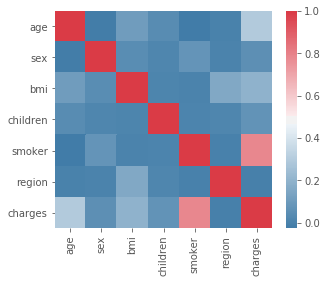

In [9]:
plt.subplots(figsize=(5, 4))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True)
plt.savefig('Docs/correlations.png')
plt.show()

Let's see distribution of charges for smokers vs. non smokers  

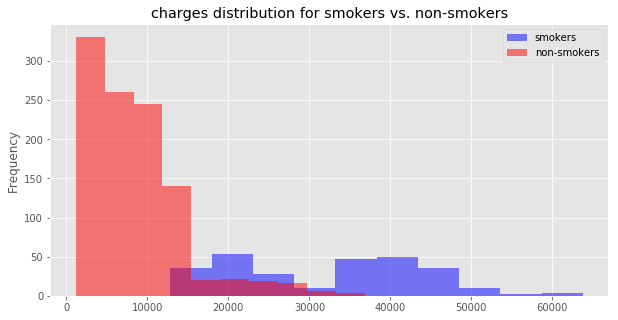

In [10]:
plt.title('charges distribution for smokers vs. non-smokers')
df.loc[df['smoker']==1]['charges'].plot.hist(bins=10, figsize=(10,5), color=['b'], alpha=0.5, grid=True)
df.loc[df['smoker']==0]['charges'].plot.hist(bins=10, figsize=(10,5), color=['r'], alpha=0.5, grid=True)
plt.legend(['smokers', 'non-smokers'])
plt.savefig('Docs/charges_distribution.png')
plt.show()

It is clear that smokers has paid high bills as compared to non-smokers

****
It looks like the majority of patients are non-smokers, let's check that out

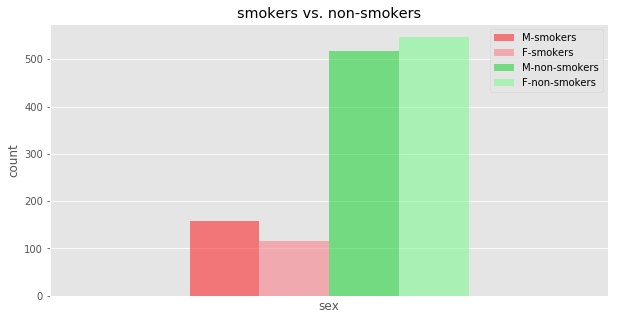

In [11]:
s = df.loc[df['smoker']==smoker['yes'], ['sex', 'age']].groupby('sex').count().rename(index={sex['male']:'Male', sex['female']:'Female'}, columns={'age':'count'})

ns = df.loc[df['smoker']==smoker['no'], ['sex', 'age']].groupby('sex').count().rename(index={sex['male']:'Male', sex['female']:'Female'}, columns={'age':'count'})

count = pd.DataFrame()
count['M-smokers'] = s.T['Male']
count['F-smokers'] = s.T['Female']
count['M-non-smokers'] = ns.T['Male']
count['F-non-smokers'] = ns.T['Female']
count.plot.bar(color=['#ff080c', '#fc6f7b', '#02d121', '#6ffc84',], figsize=(10,5), grid=True, alpha=0.5)
plt.title('smokers vs. non-smokers')

plt.ylabel('count')
plt.xlabel('sex')
plt.xticks([])
plt.savefig('Docs/population_distribution.png')
plt.show()
